# **Telecom Customer Churn Analysis**

## **Loading Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Loading dataset 
df = pd.read_csv(r'dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# general data overview
print("Columns:")
print(df.columns)
print("========\n========")
print(df.describe())
print("========\n========")
df.info()

Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
       SeniorCitizen   tenure  MonthlyCharges
count       7,043.00 7,043.00        7,043.00
mean            0.16    32.37           64.76
std             0.37    24.56           30.09
min             0.00     0.00           18.25
25%             0.00     9.00           35.50
50%             0.00    29.00           70.35
75%             0.00    55.00           89.85
max             1.00    72.00          118.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  ---

## **Data Cleaning and Preparation**

In [4]:
# data columns 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# check for duplicates on the customerID column 
df[df.duplicated(subset=['customerID'], keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [6]:
# Checking for unique values in each columns 

print("\n \n".join(f"{col}:\n{df[col].unique()}" for col in df.columns))

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 
gender:
['Female' 'Male']
 
SeniorCitizen:
[0 1]
 
Partner:
['Yes' 'No']
 
Dependents:
['No' 'Yes']
 
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 
PhoneService:
['No' 'Yes']
 
MultipleLines:
['No phone service' 'No' 'Yes']
 
InternetService:
['DSL' 'Fiber optic' 'No']
 
OnlineSecurity:
['No' 'Yes' 'No internet service']
 
OnlineBackup:
['Yes' 'No' 'No internet service']
 
DeviceProtection:
['No' 'Yes' 'No internet service']
 
TechSupport:
['No' 'Yes' 'No internet service']
 
StreamingTV:
['No' 'Yes' 'No internet service']
 
StreamingMovies:
['No' 'Yes' 'No internet service']
 
Contract:
['Month-to-month' 'One year' 'Two year']
 
PaperlessBilling:
['Yes' 'No']
 
PaymentMethod:
['Electronic check' 'Mailed

In [7]:
# create a normalized dataset where  yes and no are changed to 1 and 2 respectively, to make it fit for statistical analysis

norm_df = df.copy()
for col in norm_df.iloc[:, np.r_[3, 4, 6, 7, 9:15, 16, 20]]: 
    norm_df[col] = norm_df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

In [8]:
# Final View before analysis 
norm_df  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


## **Exploratory Data Analysis (EDA)**

**Have an approach on everything you want to check for before doing anything**

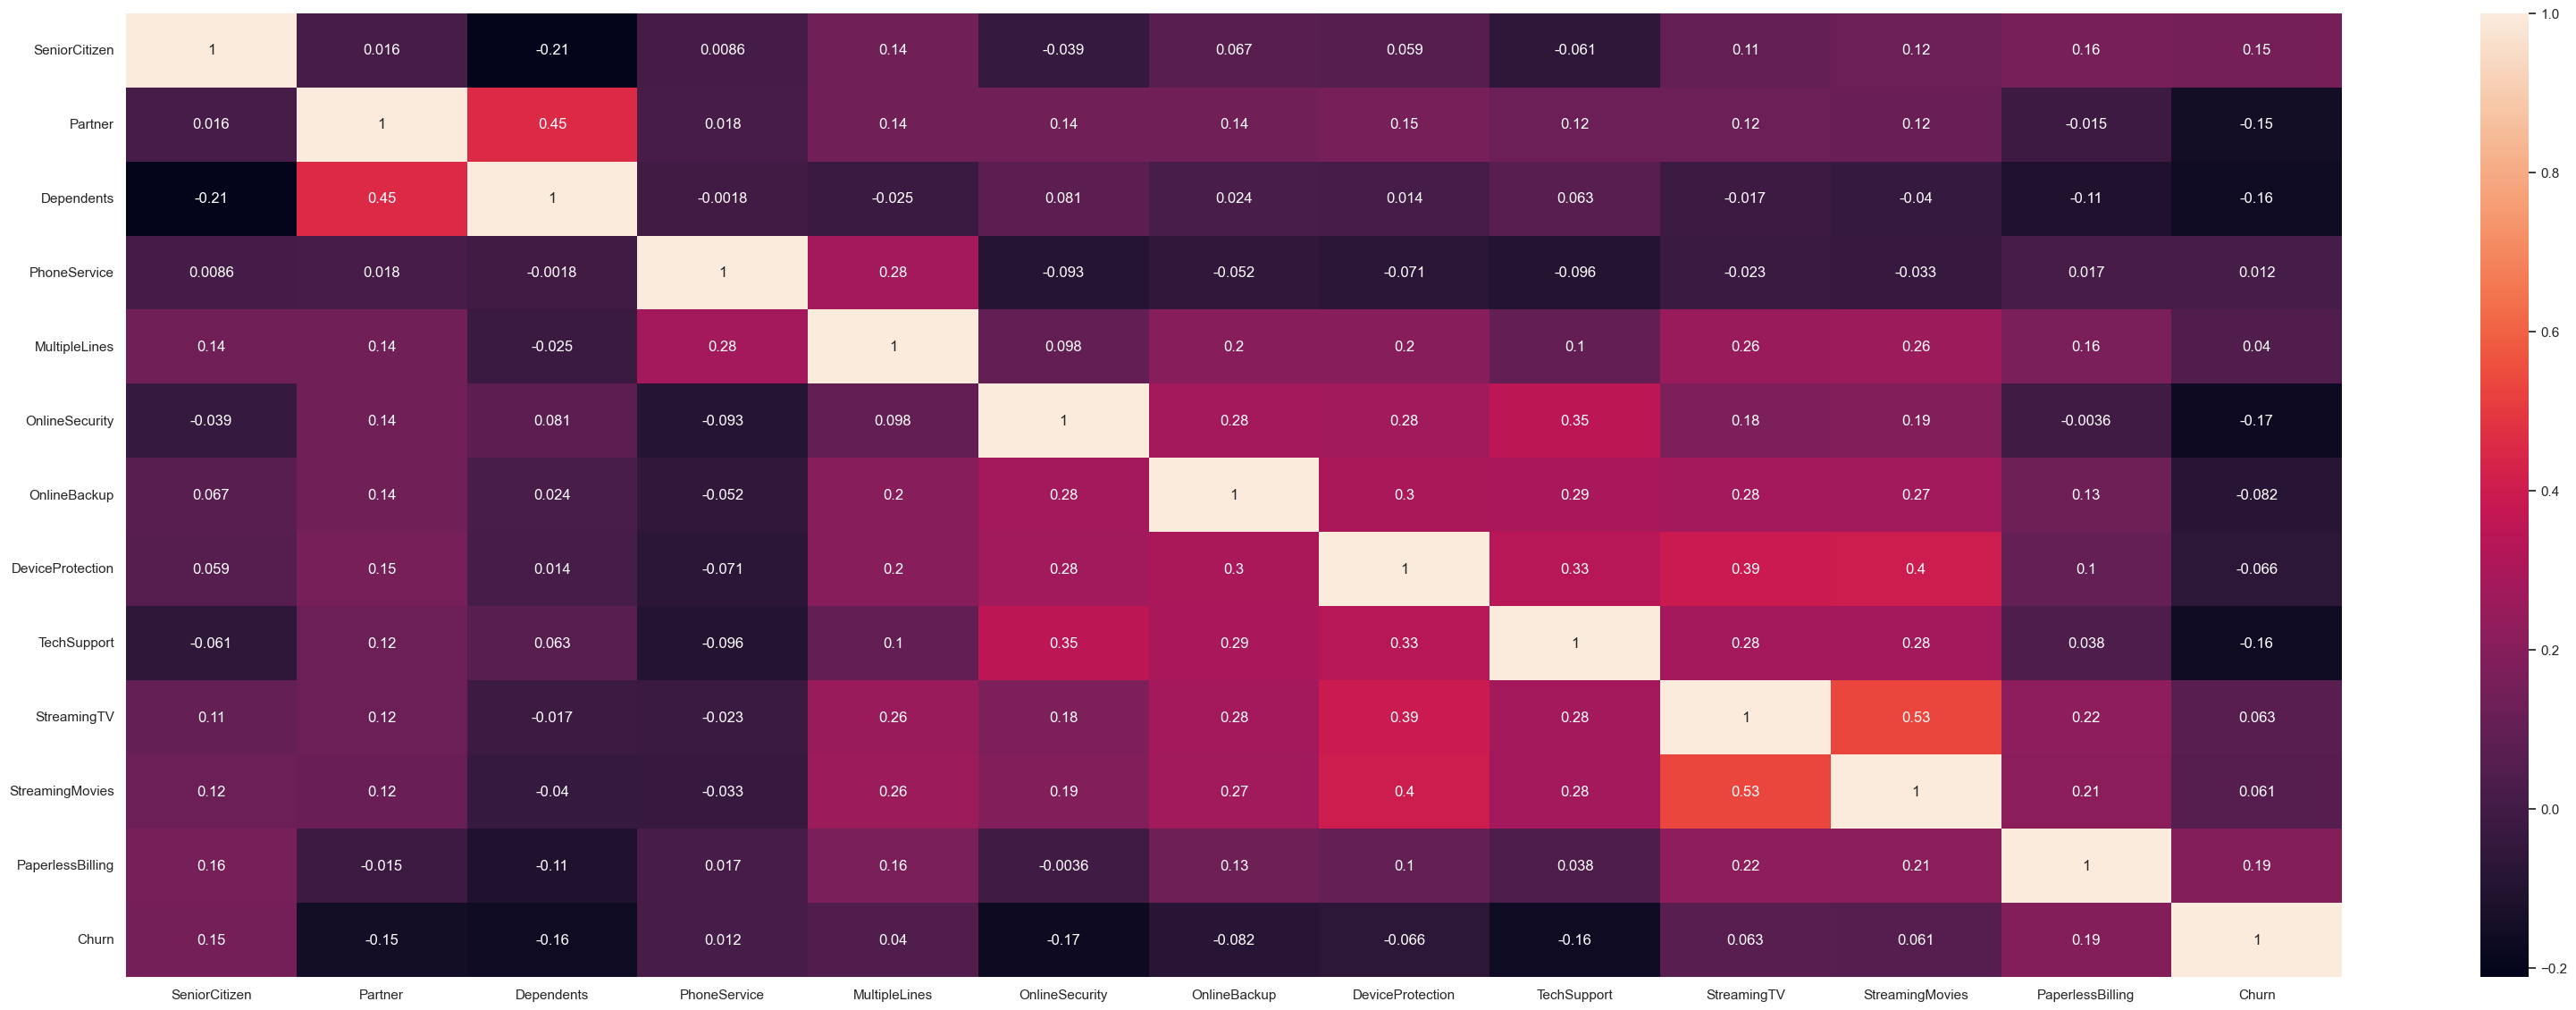

In [11]:
sns.heatmap(norm_df.iloc[:, np.r_[2:5, 6, 7, 9:15, 16, 20]].corr(), annot = True)
plt.rcParams['figure.figsize'] = (40,14)
plt.show()

In [10]:
# Checking for unique values in each columns 

print("\n \n".join(f"{col}:\n{df[col].unique()}" for col in df.columns))

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 
gender:
['Female' 'Male']
 
SeniorCitizen:
[0 1]
 
Partner:
['Yes' 'No']
 
Dependents:
['No' 'Yes']
 
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 
PhoneService:
['No' 'Yes']
 
MultipleLines:
['No phone service' 'No' 'Yes']
 
InternetService:
['DSL' 'Fiber optic' 'No']
 
OnlineSecurity:
['No' 'Yes' 'No internet service']
 
OnlineBackup:
['Yes' 'No' 'No internet service']
 
DeviceProtection:
['No' 'Yes' 'No internet service']
 
TechSupport:
['No' 'Yes' 'No internet service']
 
StreamingTV:
['No' 'Yes' 'No internet service']
 
StreamingMovies:
['No' 'Yes' 'No internet service']
 
Contract:
['Month-to-month' 'One year' 'Two year']
 
PaperlessBilling:
['Yes' 'No']
 
PaymentMethod:
['Electronic check' 'Mailed

In [39]:
Churned = df.query('Churn == "No"')
NotChurned = df.query('Churn == "Yes"')

def percenter(dataset, col_name, val): 
    return (100 * len(dataset.query(f'`{col_name}` == @val')) / len(df)) 

In [22]:
len(df.query('PhoneService == "Yes"')) + len(df.query('PhoneService == "No"'))

7043

In [19]:
100 * len(df.query('PhoneService == "Yes"')) / len(df)

90.31662643759762

7043

In [38]:
percenter(df, 'PhoneService', "Yes")

90.31662643759762